# Find the local minima of the function y=(x+5)² starting from the point x=3


Step 1 : Initialize x =3. Then, find the gradient of the function, dy/dx = 2*(x+5).

Step 2 : Move in the direction of the negative of the gradient. We use a learning rate. Let us assume the learning rate → 0.01

Step 3 : Let’s perform 2 iterations of gradient descent

Step 4 : We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

# 作業:
    請嘗試使用不同的組合驗證 learning rate 對所需 iteration 的影響
    lr = [0.1, 0.0001]
    主要驗證 Lr 對於grandient 收斂的速度
    

In [1]:
init_cur_x = 3 # The initial start point
precision = 0.000001 #This tells us when to stop the algorithm
max_iters = 10000 # maximum number of iterations
init_step_size = precision + 0.1 # The initial step size

In [2]:
fn = lambda x: (x+5)**2

df = lambda x: 2*(x+5) #Gradient of our function 

In [3]:
#lr = 0.01 # Learning rate
lr_list = [0.99, 0.9, 0.75, 0.5, 0.3, 0.1, 0.01, 0.001, 0.0001]

lr_results = dict()
for (i_lr, lr) in enumerate(lr_list):
    print(f'Learning rate: {lr}')

    '''
    MUST RESET
    # Learning rate
    #iteration counter
    #Step size  
    '''
    cur_x = init_cur_x
    previous_step_size = init_step_size
    iters = 0 #iteration counter
    iters_history = [iters]
    x_history = [cur_x]
    
    print(f"iter:{str(iters):30s} x={cur_x:.5f}") 
    per_iter_ourput = (max_iters / 20)   # 每幾步輸出
    while previous_step_size > precision and iters < max_iters:
        '''
        算法迭代更新
        '''
        prev_x = cur_x #Store current x value in prev_x
        cur_x = cur_x - lr * df(prev_x) #Gradient descent
        previous_step_size = abs(cur_x - prev_x) # 取較大的值, Change in x
        iters = iters+1 #iteration count
        if iters % per_iter_ourput == 0: 
            print(f"iter:{str(iters):30s} x={cur_x:.5f}") #Print iterations

         # Store parameters for plotting
        iters_history.append(iters)
        x_history.append(cur_x)

    print(f"Final\niter:{str(iters):30s} x={cur_x:.5f}") #Print iterations
    
    lr_results[i_lr] = (lr, iters_history, x_history)
    print('-'*50)    


Learning rate: 0.99
iter:0                              x=3.00000
iter:500                            x=-4.99967
Final
iter:822                            x=-5.00000
--------------------------------------------------
Learning rate: 0.9
iter:0                              x=3.00000
Final
iter:75                             x=-5.00000
--------------------------------------------------
Learning rate: 0.75
iter:0                              x=3.00000
Final
iter:25                             x=-5.00000
--------------------------------------------------
Learning rate: 0.5
iter:0                              x=3.00000
Final
iter:2                              x=-5.00000
--------------------------------------------------
Learning rate: 0.3
iter:0                              x=3.00000
Final
iter:18                             x=-5.00000
--------------------------------------------------
Learning rate: 0.1
iter:0                              x=3.00000
Final
iter:66                            

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

def plot_grandient(learn_rate, x_iter, x_hist):
    plt.clf()
    plt.plot(x_iter, x_hist, 'o-', ms=3, lw=1.5, color='black')
    plt.xlabel(r'$iters$', fontsize=16)
    plt.ylabel(r'$x$', fontsize=16)
    plt.title(f'learning rate:{learn_rate}',bbox=dict(facecolor='g', edgecolor='blue', alpha=0.65 ))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()
    
def plot_grandient_in_curve(learn_rate, x_iter, x_hist):
    plt.clf()
    x_curve = np.arange(-5-10, -5+10, 0.01)
    plt.plot(x_curve, fn(x_curve))

    plt.plot(x_hist, fn(np.array(x_hist)), 'o--', ms=3, lw=1.5, color='red')
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$fn(x)=(x+5)**2 $', fontsize=16)
    plt.title(f'learning rate:{learn_rate}',bbox=dict(facecolor='g', edgecolor='blue', alpha=0.65 ))
    plt.show()    
    
    
def plot_data(learn_rate, x_iter, x_hist):
    #fig, axes = plt.subplots(1, 2, constrained_layout=True)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=0.9)

    fig.suptitle(f'learning rate:{learn_rate}',bbox=dict(facecolor='g', edgecolor='blue', alpha=0.65 ))
    
    axes[0].plot(x_iter, x_hist, 'o-', ms=3, lw=1.5, color='black')
    axes[0].set_xlabel(r'$iters$', fontsize=16)
    axes[0].set_ylabel(r'$x$', fontsize=16)
    axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    x_curve = np.arange(-5-10, -5+10, 0.01)
    axes[1].plot(x_curve, fn(x_curve))

    axes[1].plot(x_hist, fn(np.array(x_hist)), 'o--', ms=3, lw=1.5, color='red')
    axes[1].set_xlabel(r'$x$', fontsize=16)
    axes[1].set_ylabel(r'$fn(x)=(x+5)**2 $', fontsize=16)
    
    plt.show()    
    

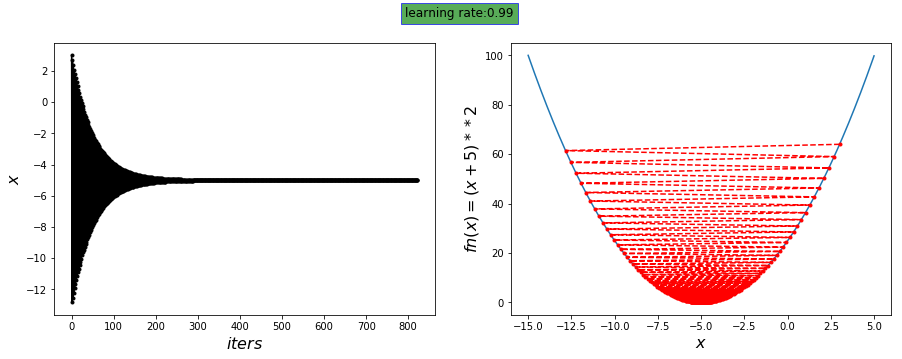

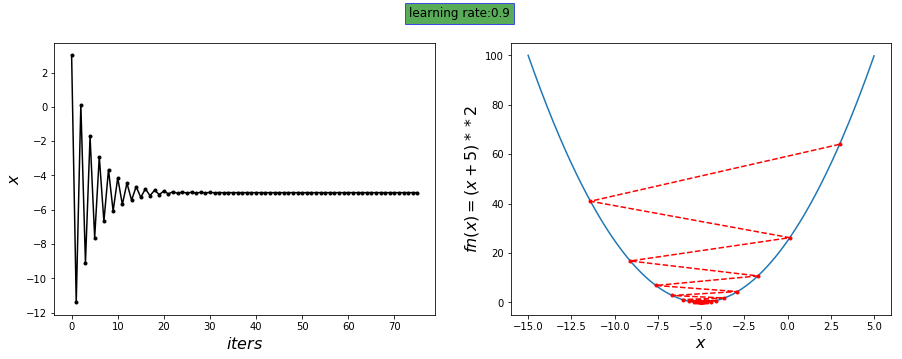

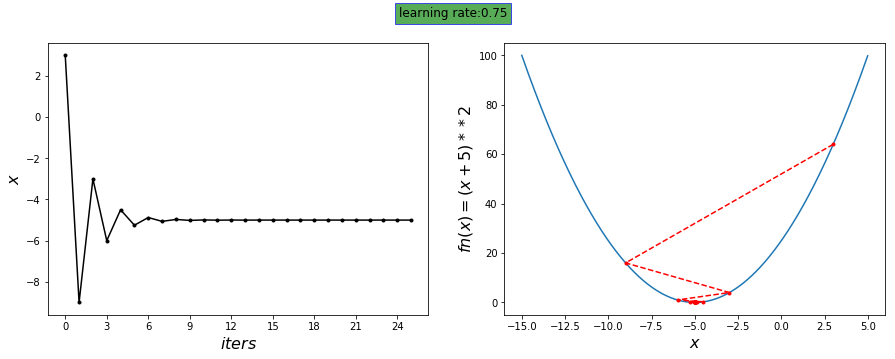

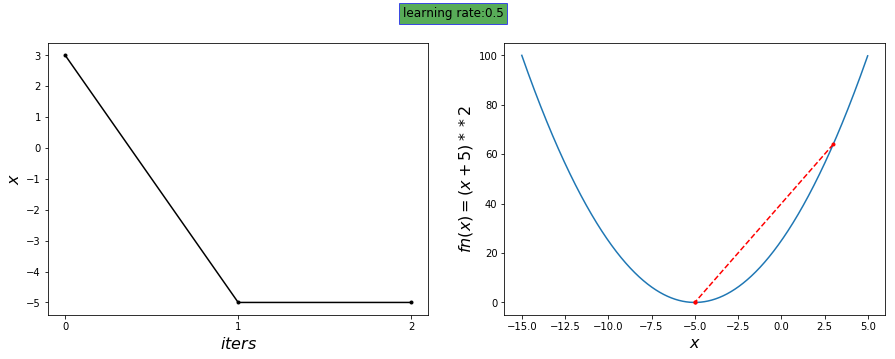

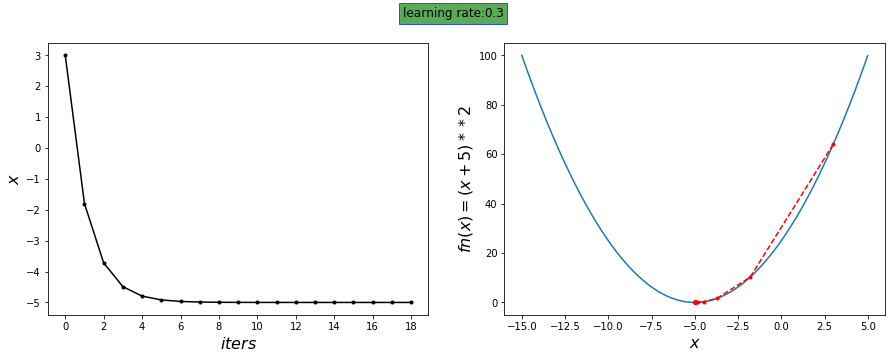

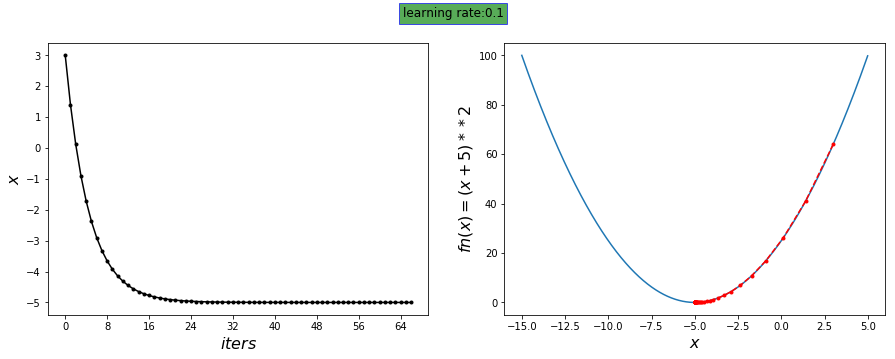

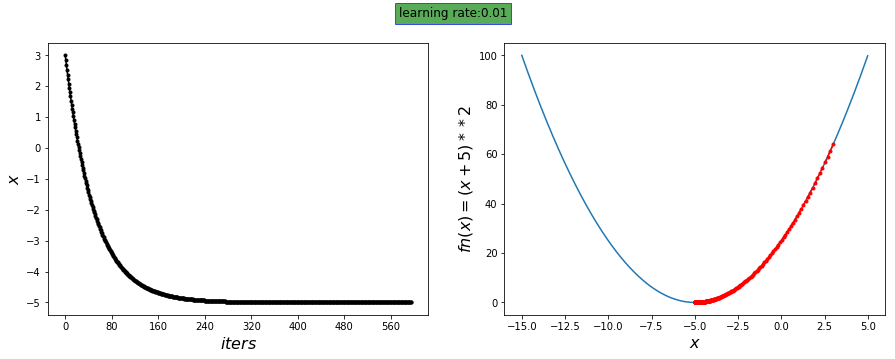

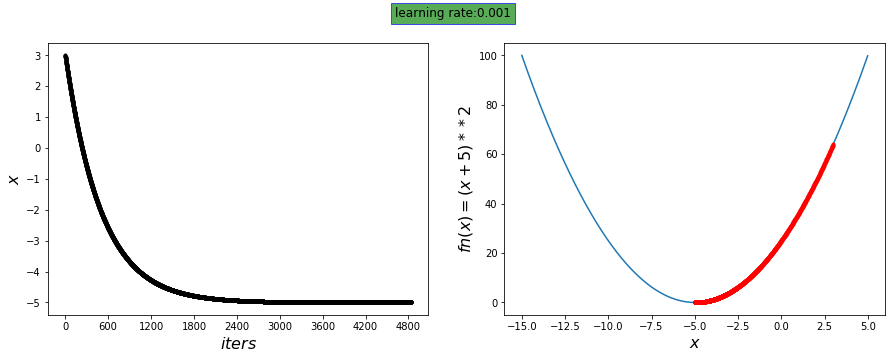

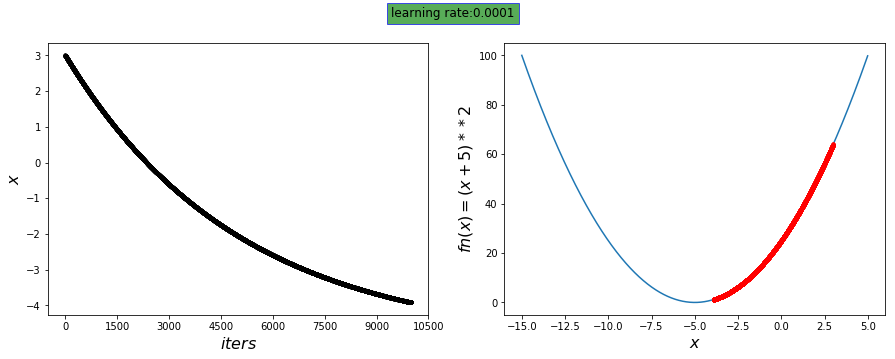

In [5]:
for i_lr in lr_results.keys():
    (learn_rate, iters_history, x_history) = lr_results[i_lr]
    
#    plot_grandient(lr, iters_history, x_history)
#    plot_grandient_in_curve(lr, iters_history, x_history)

    plot_data(learn_rate, iters_history, x_history)

ref:  
[Implement Gradient Descent in Python](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1)  
[derivative-calculator](https://www.derivative-calculator.net/)